1.1

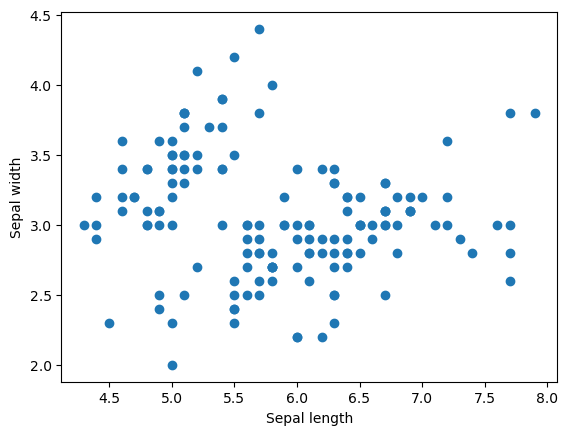

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset and extract the first two features
iris = load_iris()
x = iris.data[:, :2]

# Plot the data
plt.scatter(x[:, 0], x[:, 1])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


1.2

In [10]:
import mltools as ml
k = [2,5,20]
for i in k:
    Z, C, S = 0, 0, 0
    max_s = 0
    for t in range(6):
        z, c, s = ml.cluster.kmeans(x,i)
        if s > max_s:
            max_s = s
            Z, C, S = z, c, s
        t+=1

    ml.plotClassify2D(None, x, Z)
    plt.scatter(C[:, 0], C[:, 1], s=10, linewidth=3, color='r')
    plt.title(f'k-means clustering with k={i}')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()
    




AttributeError: module 'matplotlib.pyplot' has no attribute 'ishold'

1.3

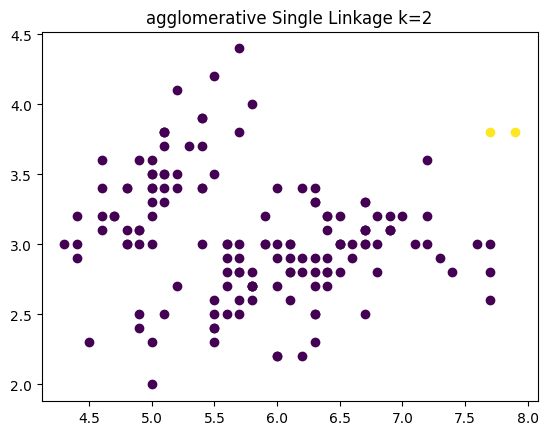

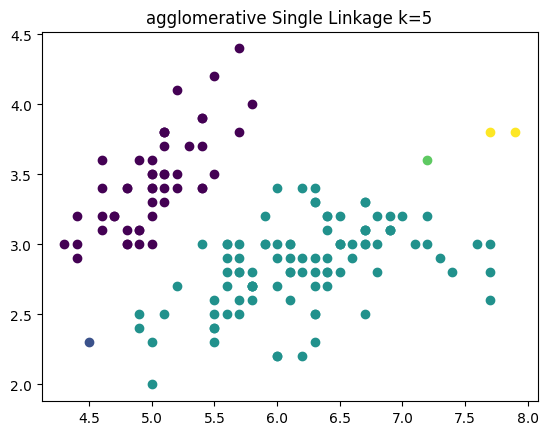

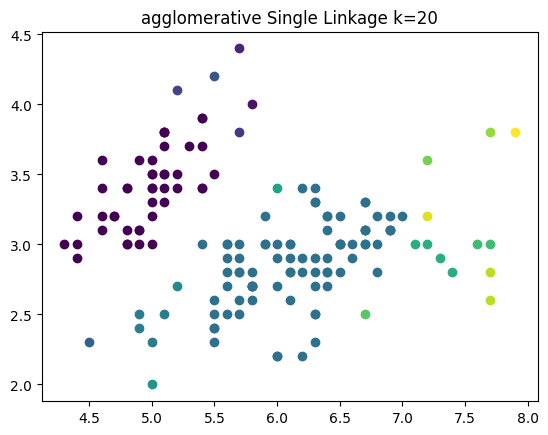

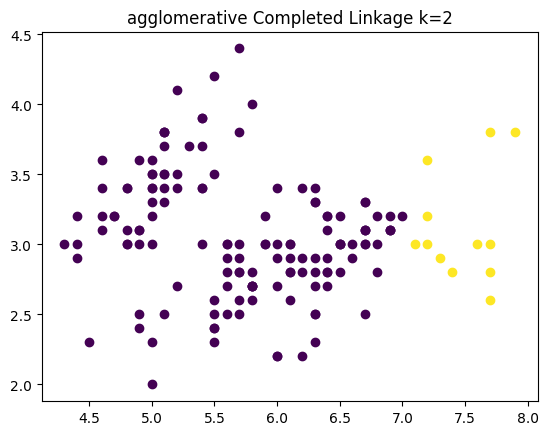

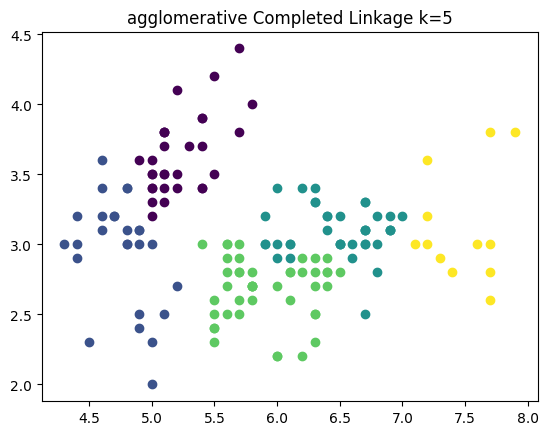

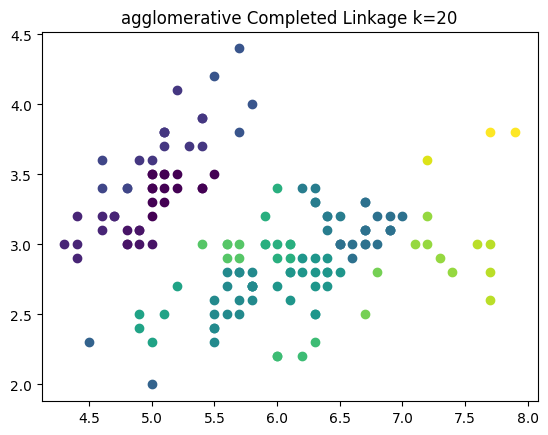

In [7]:
for i in k:
    Z, C = ml.cluster.agglomerative(x, i, method='min')
    ml.plotClassify2D(None, x, Z)
    plt.title(f'agglomerative Single Linkage k={i}')
    plt.show()

for i in k:
    Z, C = ml.cluster.agglomerative(x, i, method='max')
    plt.title(f'agglomerative Completed Linkage k={i}')
    ml.plotClassify2D(None, x, Z)
    plt.show()

1.4

 For k = 2 and 5, k-means produced accurate and clear results, and complete linkage agglomerative clustering produced similar results. However, for k = 20, k-means appeared to be overfitting, whereas agglomerative clustering had better results.
 k-means tends to work well when the data is well-separated and the clusters are relatively compact and spherical. Agglomerative clustering can handle more complex data structures and can be used to identify clusters that are not well-separated or have complex shapes.

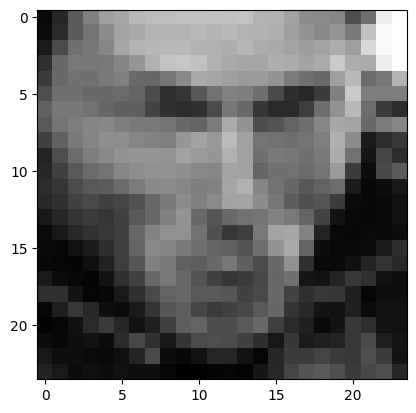

In [8]:
X = np.genfromtxt("data/faces.txt", delimiter=None) # load face dataset
plt.figure()
# pick a data point i for display
img = np.reshape(X[i,:],(24,24)) # convert vectorized data to 24x24 image patches
plt.imshow( img.T , cmap="gray") # display image patch; you may have to squint

2.1

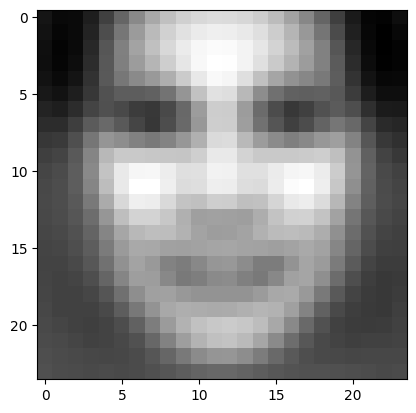

In [10]:

X_0 = X - np.mean(X, axis=0)
plt.figure()
img = np.reshape(np.mean(X, axis=0),(24,24))
plt.imshow( img.T , cmap="gray")


2.2

In [13]:
from scipy.linalg import svd
# Compute SVD of zero-mean data
U, S, Vh = svd(X_0, full_matrices=False)
W = U.dot(np.diag(S))

print("Shape of W:", W.shape)
print("Shape of Vh:", Vh.shape)

Shape of W: (4916, 576)
Shape of Vh: (576, 576)


2.3

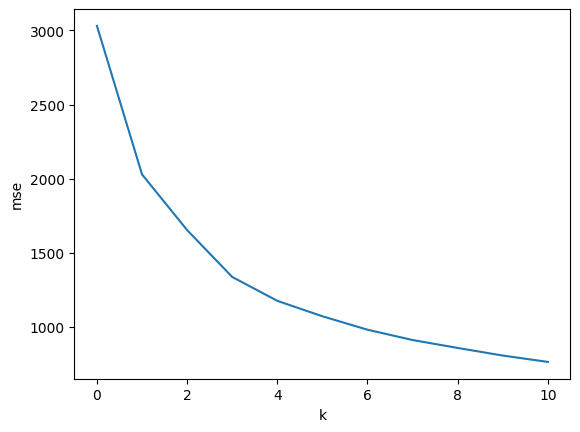

In [20]:
mses= []
k=range(11)
for i in k:
    X_hat = W[:, :i].dot(Vh[:i, :])
    mse = np.mean((X_0 - X_hat)**2)
    mses.append(mse)
plt.plot(k, mses)
plt.xlabel('k')
plt.ylabel('mse')
plt.show()


2.4

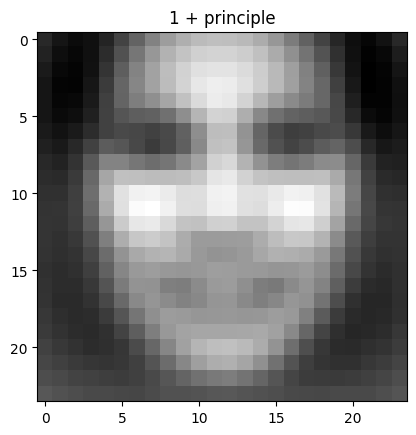

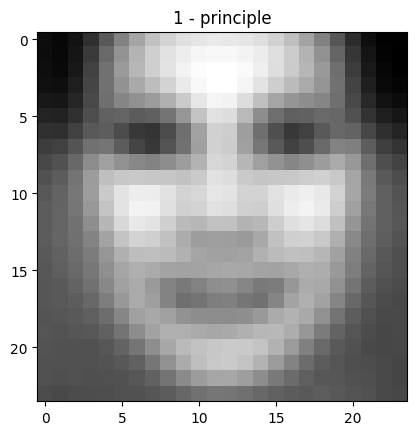

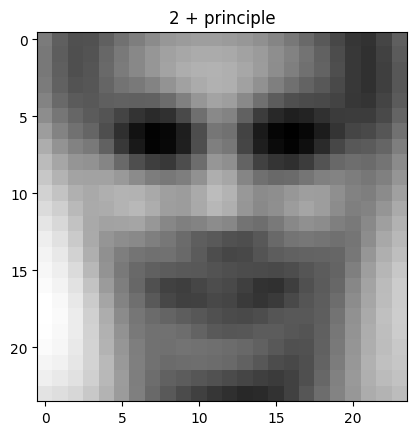

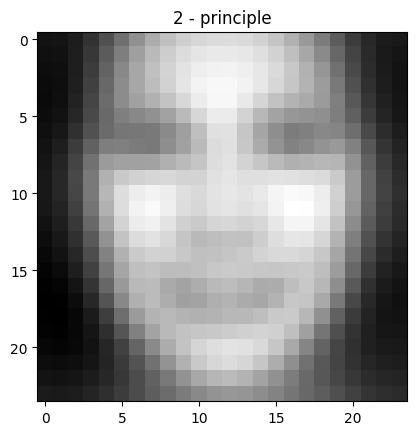

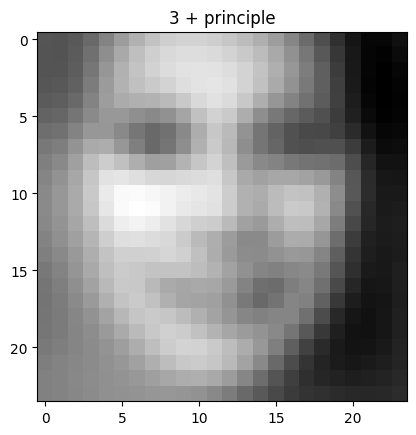

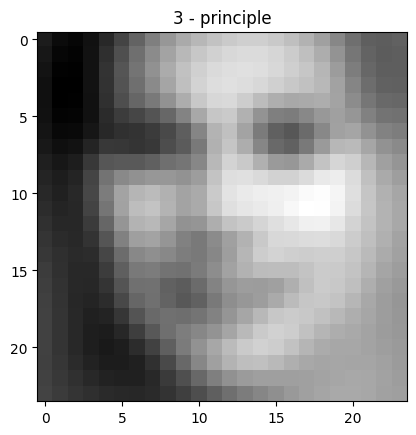

In [27]:
for j in range(0,3):
    alpha = 2*np.median(np.abs(W[:,j]))
 
    img_plus = np.reshape(np.mean(X, axis=0)+alpha*Vh[j,:], (24,24))
    plt.imshow(img_plus.T, cmap="gray")
    plt.title(str(j+1) + " + principle") 
    plt.show()
    
    img_minus = np.reshape(np.mean(X, axis=0) - alpha*Vh[j,:], (24,24))
    plt.imshow(img_minus.T, cmap="gray")
    plt.title(str(j+1) + " - principle")
    plt.show()


2.5

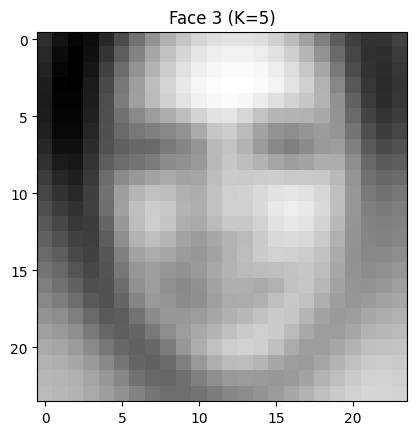

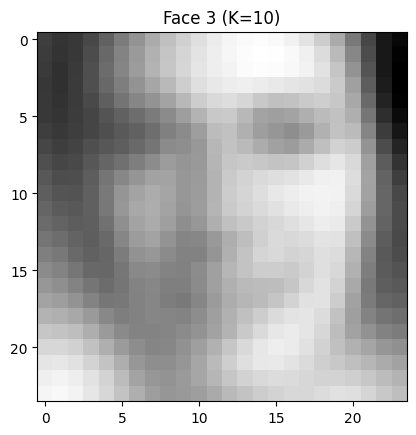

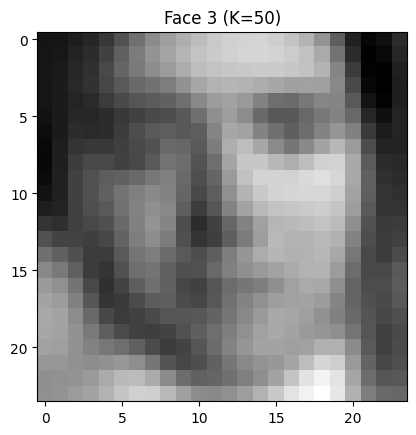

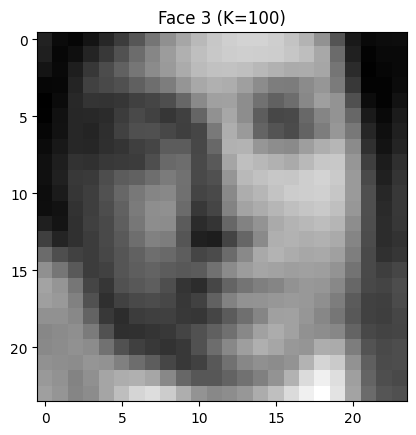

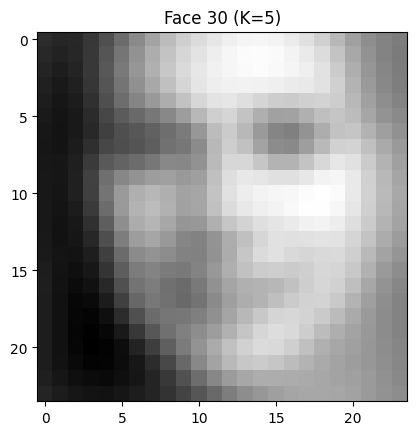

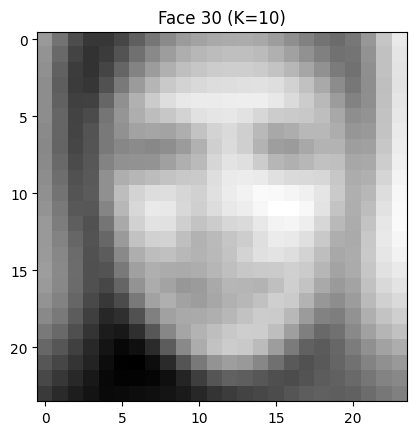

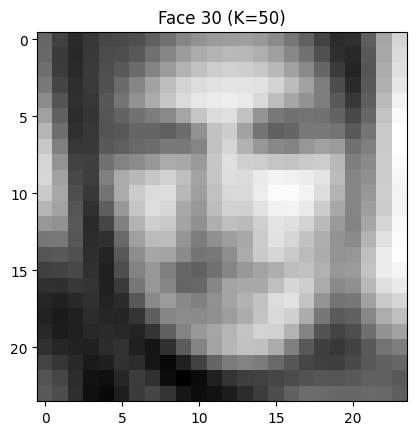

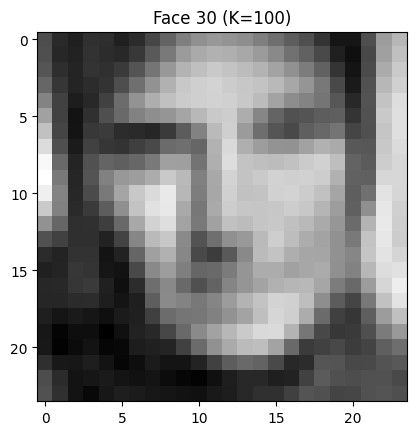

In [39]:
ks = [5,10,50,100]
ds = [3, 30]
for d in ds:
    for k in ks:
        y_hat = np.dot(W[:,:k],(Vh[:k,:]))
        img = np.reshape(y_hat[d,:]+np.mean(X, axis=0),(24,24))
        plt.imshow(img.T, cmap="gray")
        plt.title(f"Face {d} (K={k})")
        plt.show()

2.6

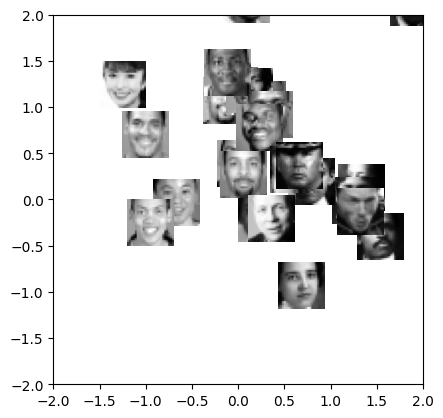

In [37]:
idx = range(0,25) # pick some data (randomly or otherwise); an array of integer indices
import mltools.transforms
coord,params = ml.transforms.rescale( W[:,0:2] ) # normalize scale of "W" locations
plt.figure(); #plt.hold(True); # you may need this for pyplot
for i in idx:
# compute where to place image (scaled W values) & size
    loc = (coord[i,0],coord[i,0]+0.5, coord[i,1],coord[i,1]+0.5)
    img = np.reshape( X[i,:], (24,24) ) # reshape to square
    plt.imshow( img.T , cmap="gray", extent=loc ) # draw each image
    plt.axis( (-2,2,-2,2) ) # set axis to a reasonable scale